In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

In [3]:
x = np.arange(1, 366)
y = np.random.randn(365)
ds = xr.DataArray(y, dims=dict(dayofyear=x))
ds

<xarray.DataArray (dayofyear: 365)>
array([-0.340443, -0.805367, -0.809523, ..., -2.1724  , -1.270511,  0.893201])
Dimensions without coordinates: dayofyear

In [4]:
sol = ds.rolling(dayofyear=31, center=True).mean()
sol

<xarray.DataArray (dayofyear: 365)>
array([nan, nan, nan, ..., nan, nan, nan])
Dimensions without coordinates: dayofyear

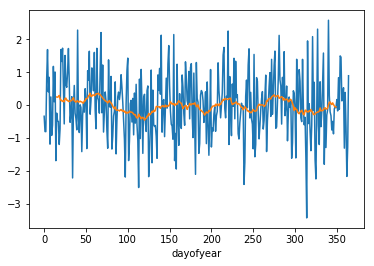

In [5]:
ds.plot()
sol.plot()

In [6]:
# take the last and first elements and append/ prepend them
first = ds[:15]
last = ds[-15:]
extended = xr.concat([last, ds, first], 'dayofyear')
print(extended.dayofyear)
# do the rolling on the extended ds and get rid of NaNs
sol1 = extended.rolling(dayofyear=31, center=True).mean().dropna('dayofyear')

<xarray.DataArray 'dayofyear' (dayofyear: 395)>
array([  0,   1,   2, ..., 392, 393, 394])
Dimensions without coordinates: dayofyear


In [7]:
# Solution 2. WHAT? OK, I fixed it
roll1 = ds.roll(dayofyear=31).rolling(dayofyear=31, center=True).mean()\
          .shift(dayofyear=-31)
roll2 = ds.roll(dayofyear=-31).rolling(dayofyear=31, center=True).mean()\
          .shift(dayofyear=31)
sol2 = xr.concat([roll1, roll2], dim='r').mean('r')

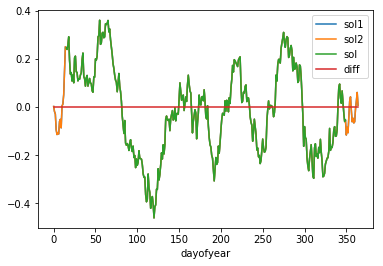

In [10]:
fig, ax = plt.subplots()
sol1.plot(ax=ax,label='sol1')
sol2.plot(ax=ax,label='sol2')
sol.plot(ax=ax,label='sol')
#roll1.plot(ax=ax,label='roll1')
#roll2.plot(ax=ax,label='roll2')
plt.plot(sol1-sol2,label='diff')
plt.legend()

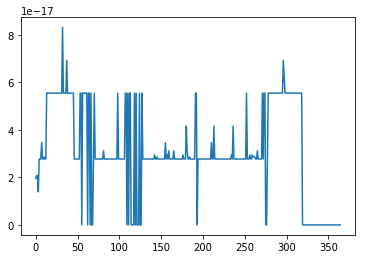

In [11]:
plt.plot(sol1-sol2)